### TUH (temple univ. hospital) EEG dataset

 - TUH는 brain wave (뇌파) 데이터를 오픈 소스로 제공하고 있음
 
 - 특히 electroencephalogram (EEG; 뇌전도)를 통한 뇌파 측정을 진행하여 데이터로 제공함
 
 - 이 데이터는 여러 사람으로부터 비슷한 채널 수로 측정되었음
 
 - 또 이 dataset 중에서는 seizure 환자로부터 획득된 데이터도 포함되어 있음
 
 - 이때 이 seizure는 여러 의과학생들과 전문가가 판독하여 시간과 유형을 분류하였음
 
 - 이 eeg dataset은 `.edf`라는 format으로 저장되어 있음
 
 - 이는 europian data format으로 bio signal (생체 신호) 데이터를 저장할 때 많이 사용됨 
 
 - 아래의 사이트는 TUH EEG open dataset의 URL
 
 > https://www.isip.piconepress.com/projects/tuh_eeg/html/downloads.shtml
 
 - 데이터를 다운로드 받기 위해서는 이메일 인증을 받아 인증 코드를 받아야 함
 
 - 또한 데이터 자체와 함께 이 데이터의 각 사람 및 환자에 대한 설명이 있는 .xlsx 파일도 함께 다운받는 것이 좋음
 
 - 그리고 영어로 데이터의 디렉토리 구조 및 각각의 데이터를 설명하는 AAREADME.txt 파일도 함께 다운 받아 읽고 접근하는 것을 권장

### TUH EEG seizure corpus dataset 확인하기

 - 여기서는 v1.2.0의 TUH EEG seizure corpus dataset를 바탕으로 설명을 진행
 
 - 먼저 디렉토리의 내부를 보면 아래와 같은 구조로 데이터들이 있음

In [1]:
from IPython.display import Image

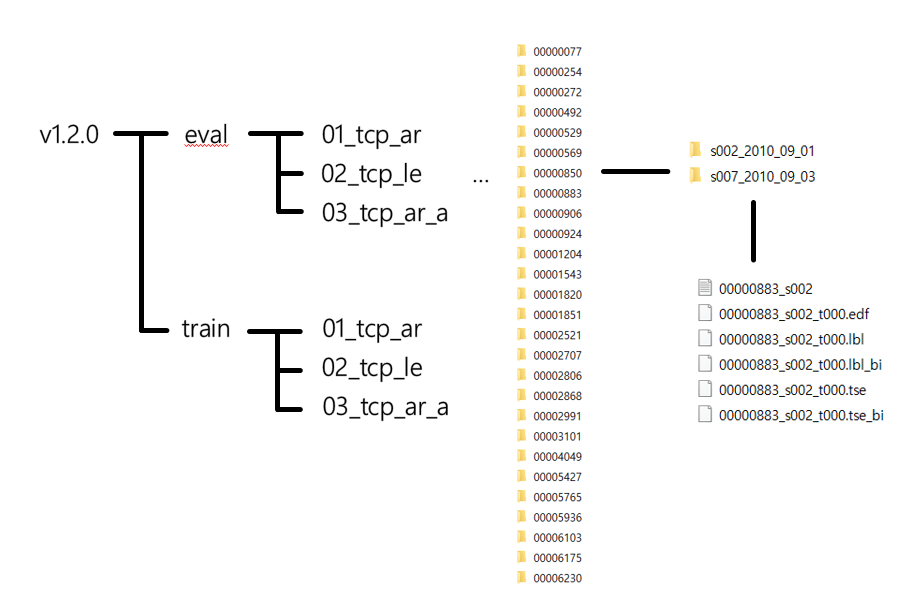

In [2]:
Image("img/01_img.png")

 - eval과 train은 deep learning이나 machine learning을 위해 데이터(환자)가 미리 분류되어 있는 것을 보여줌

 - 또한 01~03은 각각의 환자 데이터를 나누어 놓은 것인데, 여기서 필자는 어떠한 이유로 저런 단어로 나누었는지는 모름

 - 그리고 01~03의 각각의 디렉토리 내부에는 수많은 디렉토리가 있는데 이는 각 환자를 번호로 나타낸 것임
 
 - 이 중 하나를 선택하여 디렉토리 내부를 보면 여러 디렉토리로 나뉘어져 있는데 이는 그 환자로부터 언제 EEG 데이터가 획득 되었는지를 나타냄
 
 - 마지막으로 디렉토리를 하나 선택하여 들어가면 환자 번호가 있는 txt, edf, lbl, tse, tse_bi 등등 많은 파일들이 있는데 우리는 역서 txt와 edf만을 확인해 볼 것임
 
 - txt는 eeg를 획득하였던 환자의 상태 및 여러 임상적인 정보를 기록해놓은 파일
 
 - edf는 eeg 데이터가 저장되어 있는 파일 자체

### MNE library 및 개발 환경

 - MNE는 MEG N EEG의 약자로 Magnetoencephalography와 electroencephalogram와 같은 brain wave 데이터를 다루는데 특화된 library
 
 - command window를 열고 `pip install`을 사용하여 패키지 설치를 진행할 수 있음
 
 > `pip install mne`
 
 - 여기서 진행할 eeg data 분석은 windows 10에서 python 3.6.x 으로 진행하고자 함

### read eeg edf file and check information

 - 먼저 `data` directory에 위에서 다운받은 TUH의 eeg edf 파일을 하나 저장
 
 - 필자는 `00002806_s001_t000.edf`를 선택하였음
 
 - 이 데이터를 mne로 읽고 이 데이터에 대한 information을 확인해보고자 함

In [3]:
# eeg 데이터의 경로를 정의
eeg_data_path = 'data/00002806_s001_t000.edf'

In [4]:
# 사용할 모듈의 함수를 정의
from mne.io import read_raw_edf

In [6]:
# 데이터를 읽기
raw = read_raw_edf(eeg_data_path, preload=True)

Extracting EDF parameters from data/00002806_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10399  =      0.000 ...    25.997 secs...


In [7]:
# 데이터의 정보를 확인
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, ...
    chs : list | 32 items (EEG: 31, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 200.0 Hz
    meas_date : tuple | 2004-12-23 15:36:08 GMT
    nchan : int | 32
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 400.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xp